In [320]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


import warnings
warnings.filterwarnings('ignore')

###### from dotenv import load_dotenv
load_dotenv()

In [321]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET")



In [322]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [323]:
#Top Stocks for each sector 

In [324]:

# Set the tickers
tickers =  ["SPY", "BRK.B", "PRU", "JNJ", "BAC", "RTX", "DIS", "RIO" ]
timeframe = "1D"

# Set start and end datetimes 
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2018-12-03", tz="America/New_York").isoformat()


# Get historical data for all stocks
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head()

BAC                                    BRK.B  \
                            open   high    low    close    volume    open   
time                                                                        
2018-01-02 05:00:00+00:00  29.75  29.90  29.61  29.8985  49693103  198.87   
2018-01-03 05:00:00+00:00  29.90  29.94  29.69  29.8000  50663550  197.00   
2018-01-04 05:00:00+00:00  29.97  30.44  29.88  30.1900  70404731  200.90   
2018-01-05 05:00:00+00:00  30.37  30.42  30.05  30.3000  47197981  201.00   
2018-01-08 05:00:00+00:00  30.23  30.27  30.05  30.1000  37894570  201.15   

                                                              ...  RTX       \
                               high     low   close   volume  ... open high   
time                                                          ...             
2018-01-02 05:00:00+00:00  198.8700  195.96  197.23  3028270  ...  NaN  NaN   
2018-01-03 05:00:00+00:00  200.0000  197.00  199.76  2368797  ...  NaN  NaN   
2018-01-04 05:00:00+00:00  202.1299  200.01  200.63  2642837  ...  NaN  NaN   
2018-01-05 05:00:00+00:00  201.6700  199.31  201.17  2634698  ...  NaN  NaN   
2018-01-08 05:00:00+00:00  203.0700  199.80  202.74  2409926  ...  NaN  NaN   

                                                SPY                          \
                           low close volume    open    high     low   close   
time                                                                          
2018-01-02 05:00:00+00:00  NaN   NaN    NaN  267.84  268.81  267.40  268.80   
2018-01-03 05:00:00+00:00  NaN   NaN    NaN  268.95  270.64  268.95  270.47   
2018-01-04 05:00:00+00:00  NaN   NaN    NaN  271.21  272.16  271.10  271.63   
2018-01-05 05:00:00+00:00  NaN   NaN    NaN  272.50  273.56  271.95  273.39   
2018-01-08 05:00:00+00:00  NaN   NaN    NaN  273.31  274.10  272.98  273.93   

                                     
                             volume  
time                                 
2018-01-02 05:00:00+00:00  50844678  
2018-01-03 05:00:00+00:00  53141377  
2018-01-04 05:00:00+00:00  47841096  
2018-01-05 05:00:00+00:00  45782622  
2018-01-08 05:00:00+00:00  33627800  

[5 rows x 40 columns]

In [325]:
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,SPY,BRK.B,PRU,JNJ,BAC,RTX,DIS,RIO
2018-01-02,268.80,197.23,115.44,139.2400,29.8985,NaN,111.80,54.75
2018-01-03,270.47,199.76,115.49,140.5300,29.8000,NaN,112.26,54.94
2018-01-04,271.63,200.63,116.52,140.5256,30.1900,NaN,112.23,54.70
2018-01-05,273.39,201.17,117.64,141.6600,30.3000,NaN,111.58,54.53
2018-01-08,273.93,202.74,117.61,141.8500,30.1000,NaN,110.00,55.65


In [326]:
df_rolling_prices = df_closing_prices.rolling(window=100).mean()
df_rolling_prices

,SPY,BRK.B,PRU,JNJ,BAC,RTX,DIS,RIO
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-11-27,281.3343,208.608242,97.80555,136.46771,29.602681,NaN,113.21285,50.26099
2018-11-28,281.3004,208.887542,97.77185,136.67171,29.596431,NaN,113.31430,50.17899
2018-11-29,281.2515,209.166042,97.73035,136.85671,29.588631,NaN,113.41990,50.08709
2018-11-30,281.2402,209.446442,97.71375,137.06051,29.585801,NaN,113.49360,50.02079


<AxesSubplot:>

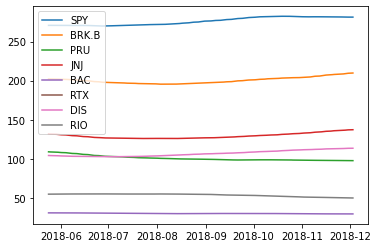

In [335]:
df_rolling_prices.plot()

<AxesSubplot:ylabel='Frequency'>

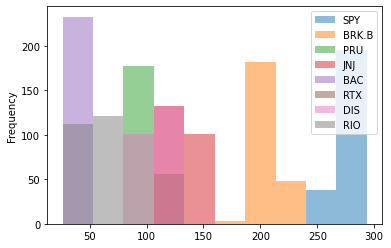

In [328]:
df_closing_prices.plot.hist(alpha=0.5)

<AxesSubplot:xlabel='time'>

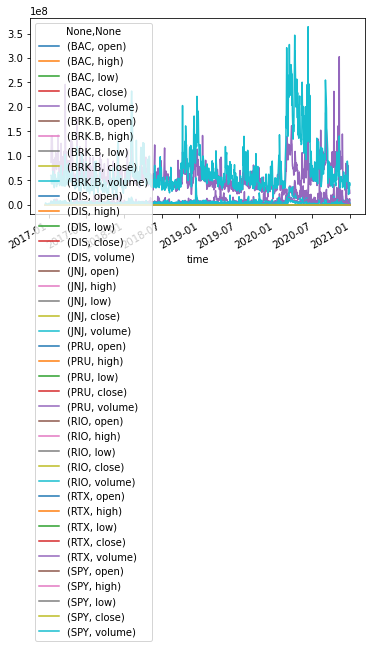

In [329]:
# Set the ticker
ticker = ["SPY", "BRK.B", "PRU", "JNJ", "BAC", "RTX", "DIS", "RIO"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2010-01-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-30", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data.plot()

In [340]:
ticker_data_df = pd.concat([SPY], [BRK.B], [PRU], [JNJ], [BAC], [RTX], [DIS], [RIO]), axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_f_data_range_df.sort_index(inplace=True)

# Set column names
combined_f_data_range_df.columns = ['SPY', 'VNG', 'REM']

# Display a few rows
combined_f_data_range_df.head()

SyntaxError: unmatched ')' (<ipython-input-340-46d54e0ec8cb>, line 1)

In [330]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
# ["SPY", "BRK.B", "PRU", "JNJ", "BAC", "RTX", "DIS", "RIO"]
weights = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.16]
df_closing_prices = df_closing_prices.dot(weights)
df_closing_prices()

TypeError: 'Series' object is not callable

In [308]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

NameError: name 'daily_returns' is not defined